In [754]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy
import numpy as np

In [755]:
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast
from gatspy.periodic import LombScargle
from matplotlib.backends.backend_pdf import PdfFile, PdfPages

### create pdffile


In [756]:
def create_pdf(export_name,c):
    global pdfFile
    if c <10:
        pdfFile = PdfPages(f"data/power_spectrum/00{c}({export_name}).pdf")
    else: 
        pdfFile = PdfPages(f"data/power_spectrum/0{c}({export_name}).pdf")

In [757]:
from statistics import mean
from turtle import filling
num=list()
def read(path):
    global df
    df = pd.read_csv(path)
    global wu_pulmer_score
    wu_pulmer_score = list(df["Wu-Pulmer"])
    global SBERT
    SBERT = list(df["SBERT"])
    global Wu_Pulmer_Divided 
    Wu_Pulmer_Divided = list(df["Wu-Pulmer_divided"])
    global pair_counts
    pair_counts = list(df["pair_counts"])
    q=0
    global num
    num=[]
    while q <len(df):
        num += [q]
        q+=1
   
    

In [758]:
l = np.array([1,2])
print(l[-1])

2


抓極值

In [759]:
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText
from scipy.signal import argrelextrema

In [760]:
a = np.array([2,3,1,4,3,5,2])
a = np.append(a,[2,3])
print(a[-2])

2


In [761]:
a = np.array([a for a in range(10)])
print(a[numpy.where(a == 5)])
print()

[5]



設定想要找幾個極值

In [762]:
#num_of_extremum = 1 #設定想要找幾個極值

畫圖加上匯出指定數量的波峰的函式

In [763]:
from ctypes.wintypes import SIZE


def calculate_PSD(a,y): #y是計算幾個波峰
    global q
    num_of_extremum = y
    frequency, power = LombScargle(num,wu_pulmer_score).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    #fig, ax=plt.subplots(figsize = (20,6))
    plt.title(f"subject:{a}     raw_wu_pulmer_score_PSD ")
    plt.grid()
    plt.xlabel("frequency")
    plt.plot(frequency, power)   
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    #trans = transforms.blended_transform_factory( ax.get_yticklabels()[0].get_transform(), ax.transData)
    #plt.text(0,23, "{:.0f}".format(max(power)), color="red", transform=trans, ha="right", va="center")
    #plt.scatter(argrelextrema(power,np.greater), power[argrelextrema(power,np.greater)],c='red') #找極值用的
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)
    according_power1 = np.array([])
    for z in range(0,num_of_extremum):
        according_power1 = np.append(according_power1,power[numpy.where(frequency == pmaxf[z])])
    pmaxf1 = list(pmaxf)
    according_power1 = list(according_power1)
    

    


    frequency, power = LombScargle(num,SBERT).autopower(minimum_frequency=0,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{a}     SBERT_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)
    according_power2 = np.array([])
    for z in range(0,num_of_extremum):
        according_power2 = np.append(according_power2,power[numpy.where(frequency == pmaxf[z])])
    pmaxf2 = list(pmaxf)
    according_power2 = list(according_power2)


    frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{a}     wu_palmer_divided_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    try:
        extremum = np.sort(power[argrelextrema(power,np.greater)])
    except:
        print("no extremum")
    pmaxf = np.array([])
    try:
        for i in range(1, (num_of_extremum+1)):
            pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
            #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
            plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
            plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    except:
        print("no extremum")
    
    pdfFile.savefig(fig)
    according_power3 = np.array([])
    try:
        for z in range(0,num_of_extremum):
            according_power3 = np.append(according_power3,power[numpy.where(frequency == pmaxf[z])])
    except:
        print()
    pmaxf3 = list(pmaxf)
    according_power3 = list(according_power3)
    period_Wu= []
    try:
        for i in range(0,num_of_extremum):
            period_Wu.append(1/pmaxf1[i])
    except:
        print()
    results_csv = pd.DataFrame(zip(pmaxf1,according_power1,pmaxf2,according_power2,pmaxf3,according_power3,period_Wu), columns = ["frequency(wu)","power(wu)","frequency(SBERT)","power(SBERT)","frequency(wu2)","power(wu2)","period(Wu)"])
    #power從大到小

    if a <10:
        results_csv.to_csv(f'data/peaks_of_PSD/00{a}(peaks).csv')
    else:
        results_csv.to_csv(f'data/peaks_of_PSD/0{a}(peaks).csv')
    


用來看單一個的

In [764]:

x = 10
read(f"data/Text/0{x}(peakstep).csv")
#create_pdf("PSD_OF_SBERT",x)
#find_extremum_and_SBERT_PSD(x,1)
            
#pdfFile.close()


In [765]:
global q
global cycle
cycle = []

In [766]:
def find_extremum_and_SBERT_PSD(subject_number,y):#y是計算幾個波峰
    global SBERT
    SBERT = np.array(SBERT)
    
    new_SBERT_high_x = list(argrelextrema(SBERT, np.greater))
    new_SBERT_high =  list(SBERT[argrelextrema(SBERT, np.greater)])
   
   
    new_SBERT_low_x = list(argrelextrema(SBERT, np.less))
    new_SBERT_low =  list(SBERT[argrelextrema(SBERT, np.less)])

    num_of_extremum = y
    
    length_of_list = max(int(new_SBERT_high_x[0][-1]),int(new_SBERT_low_x[0][-1]))
    
    new_01_list = [2 for x in range(int(length_of_list)+1)] #設計一個含有很多2的元素之後刪掉，因為SBERT不會超過1
    new_num = []
    for i in range(len(new_SBERT_high)):
        new_01_list[new_SBERT_high_x[0][i]] = 1
        new_num.append(new_SBERT_high_x[0][i])
    for i in range(len(new_SBERT_low_x[0])):
        new_01_list[new_SBERT_low_x[0][i]] = -1
        new_num.append(new_SBERT_low_x[0][i])
    new_01_list= list(filter((2).__ne__, new_01_list)) #刪除掉2這個元素
    normalized_SBERT = new_01_list
    
    new_num = sorted(new_num)
    
    
    frequency, power = LombScargle(new_num,normalized_SBERT).autopower(minimum_frequency=0,maximum_frequency=0.5)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{q}     PSD_of_cutoutSBERT ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)
    according_power2 = np.array([])
    for z in range(0,num_of_extremum):
        according_power2 = np.append(according_power2,power[numpy.where(frequency == pmaxf[z])])
    pmaxf2 = list(pmaxf)
    according_power2 = list(according_power2)


  
    fig = plt.figure(figsize=(20,6))
    plt.plot(new_num,normalized_SBERT )
    plt.xlabel("Timeframe(no.)")
    plt.ylabel("wu_pulmere_divided")
    plt.title(f"subject:{q}     wu_pulmer_divided_by_pairs")
    plt.grid()
    plt.xlim(0, len(new_num))
    plt.ylim(-2,2)
    plt.show
    pdfFile.savefig(fig)

    if normalized_SBERT[0] == 1 and normalized_SBERT[-1] == 1:
        cycle_count = len(new_SBERT_high) -1 
    elif normalized_SBERT[0] == 1 and normalized_SBERT[-1] != 1:
        cycle_count = len(new_SBERT_high) + 0.5
    elif normalized_SBERT[0] == -1 and normalized_SBERT[-1] == -1:
        cycle_count = len(new_SBERT_low) -1 
    elif normalized_SBERT[0] == -1 and normalized_SBERT[-1] != -1:
        cycle_count = len(new_SBERT_low) + 0.5

    global cycle
    cycle.append(cycle_count/len(new_num))

    print()

In [767]:
'''
x = 2
read(f"data/Text/00{x}(peakstep).csv")
create_pdf("PSD_OF_SBERT",x)
find_extremum_and_SBERT_PSD(x,1)
'''

'\nx = 2\nread(f"data/Text/00{x}(peakstep).csv")\ncreate_pdf("PSD_OF_SBERT",x)\nfind_extremum_and_SBERT_PSD(x,1)\n'

抓極值

c:\Users\chang\anaconda3\envs\for_matplotlib\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))




error: 3
error: 4
error: 5



c:\Users\chang\anaconda3\envs\for_matplotlib\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))




error: 9


error: 12






c:\Users\chang\anaconda3\envs\for_matplotlib\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
C:\Users\chang\AppData\Local\Temp\ipykernel_20996\17111168.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (20,6))


c:\Users\chang\anaconda3\envs\for_matplotlib\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
c:\Users\chang\anaconda3\envs\for_matplotlib\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))




error: 22

error: 24
[0.4954128440366973, 0.47058823529411764, 0.47368421052631576, 0.5073529411764706, 0.49122807017543857, 0.49056603773584906, 0.5166666666666667, 0.49572649572649574, 0.53125, 0.5178571428571429, 0.49333333333333335, 0.5416666666666666, 0.48936170212765956, 0.4945054945054945, 0.5096153846153846, 0.5108695652173914, 0.5192307692307693]


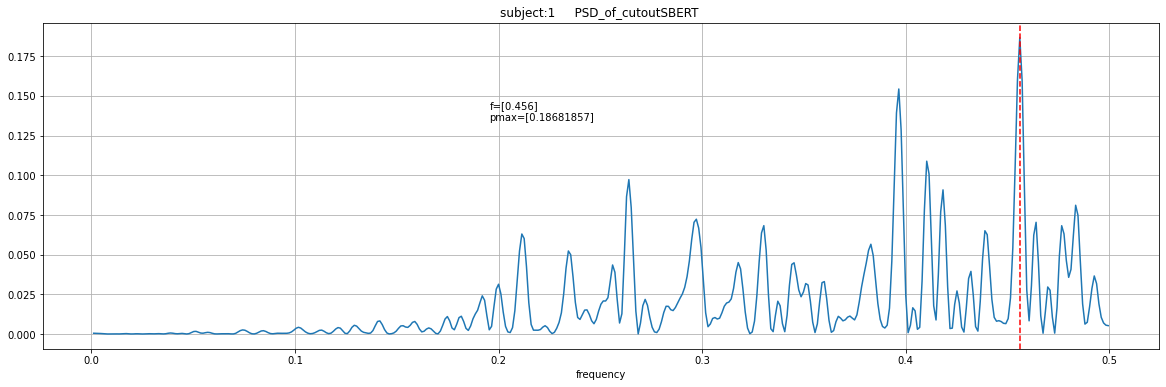

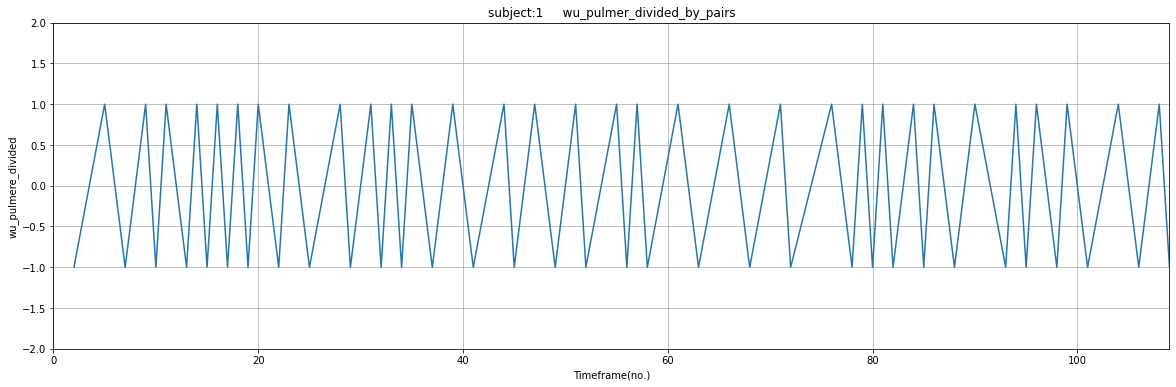

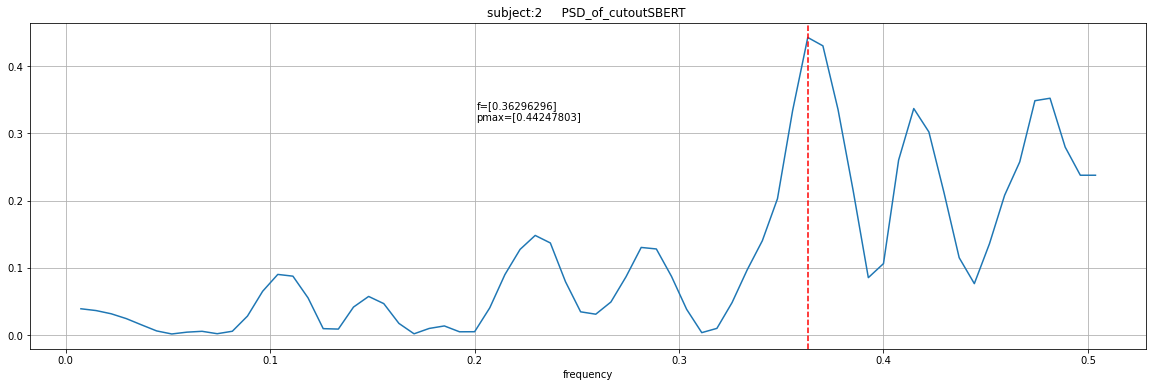

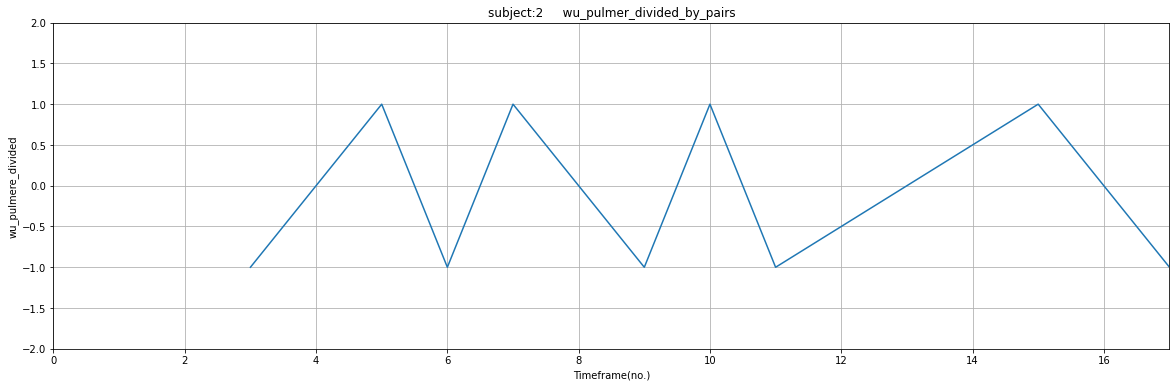

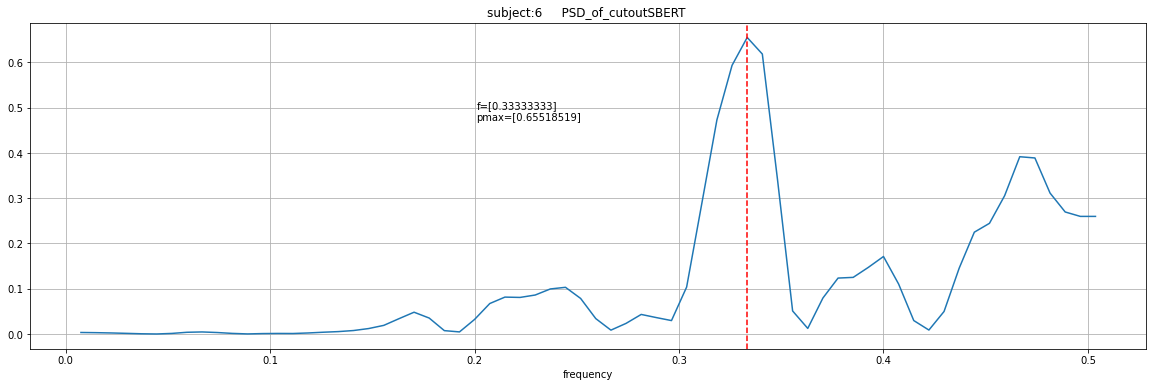

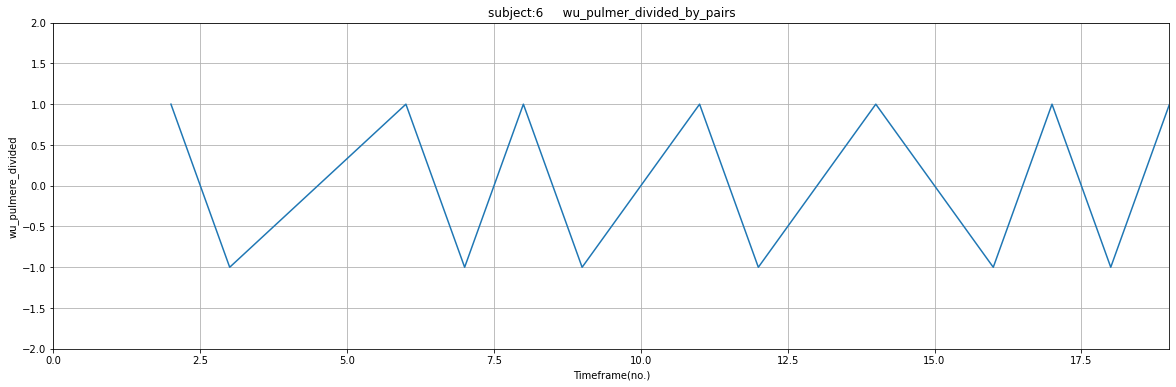

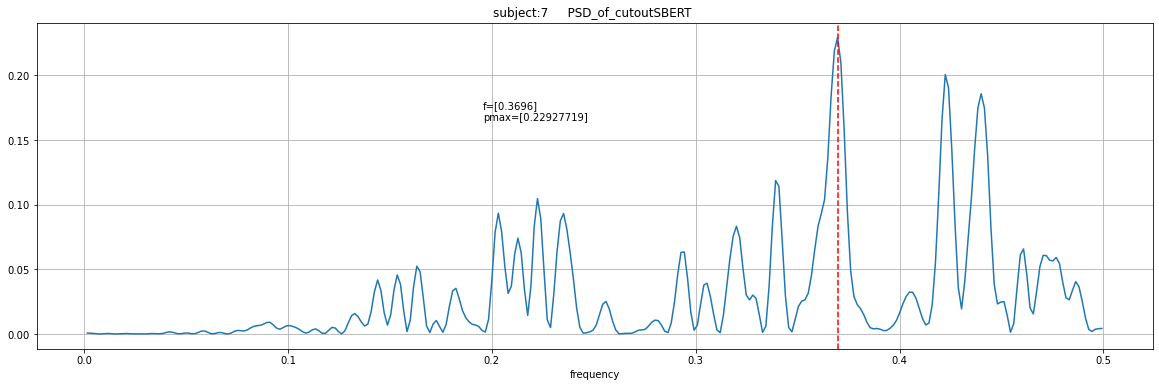

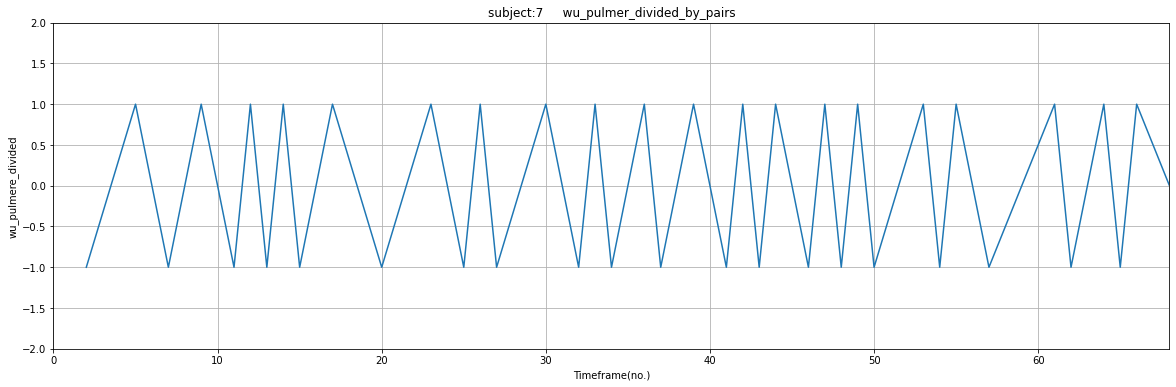

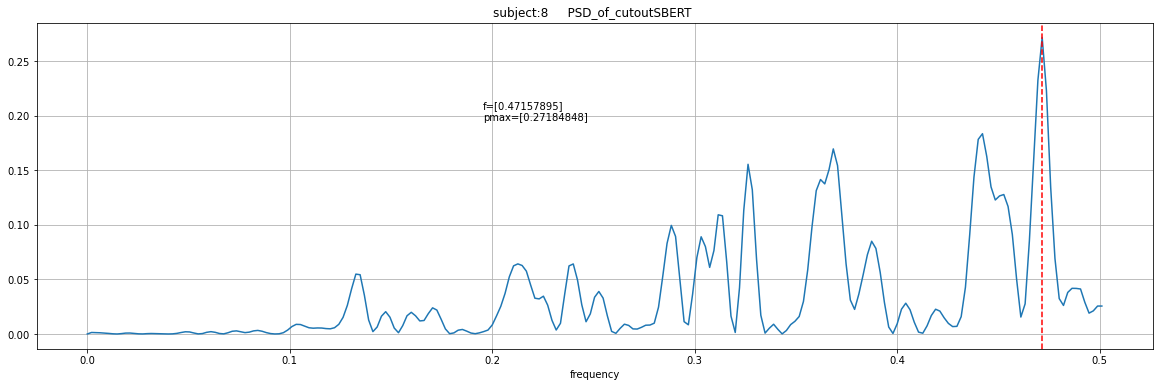

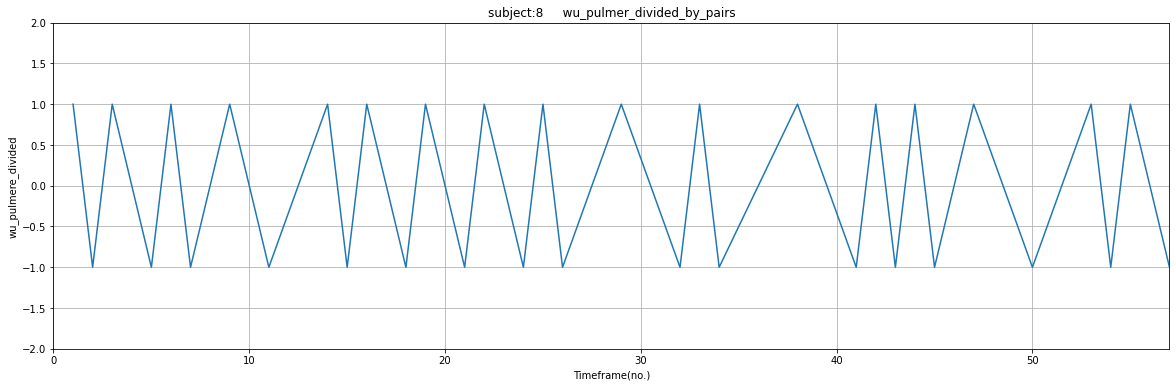

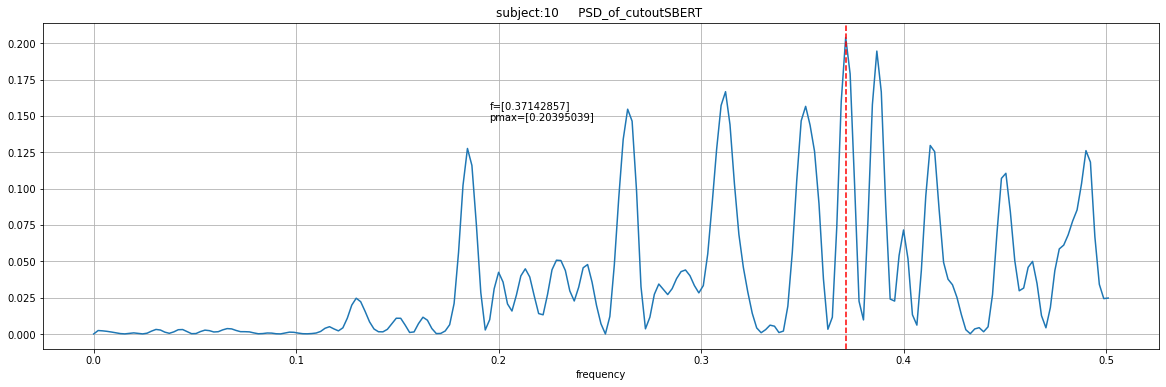

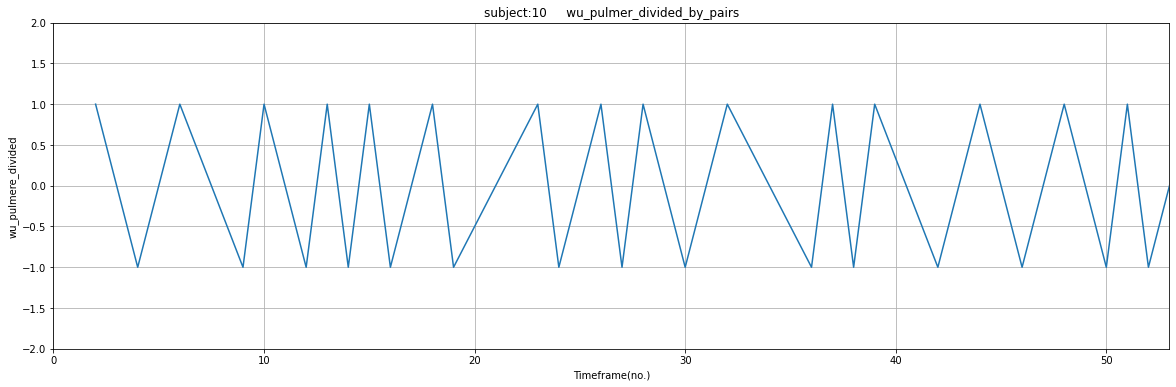

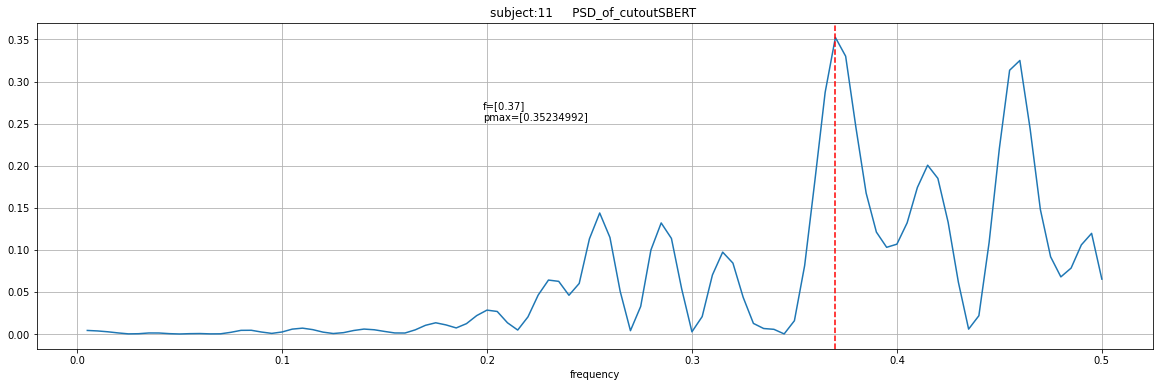

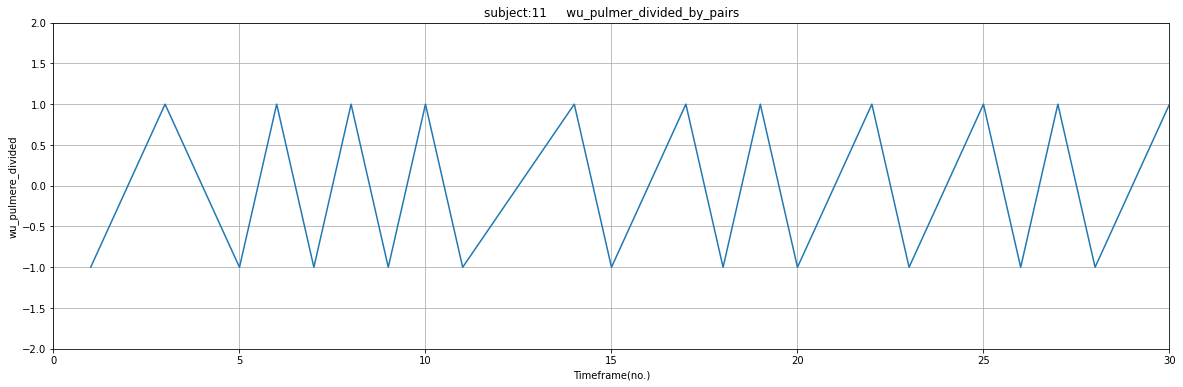

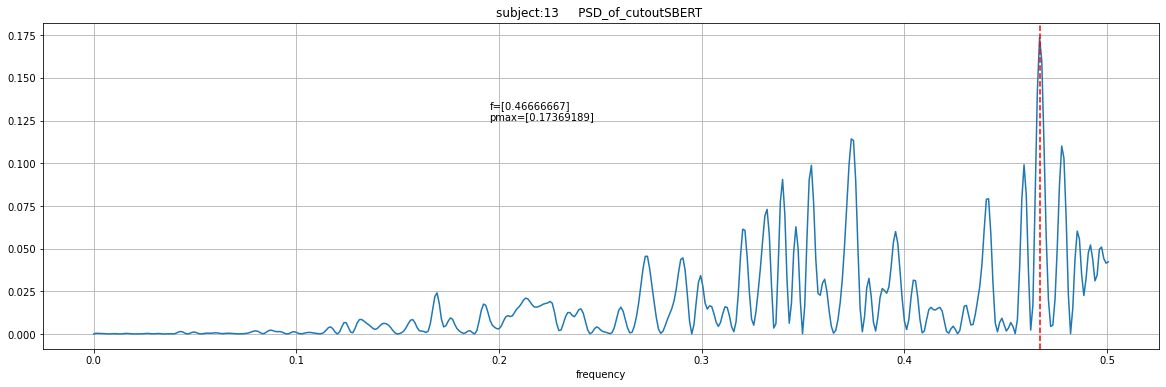

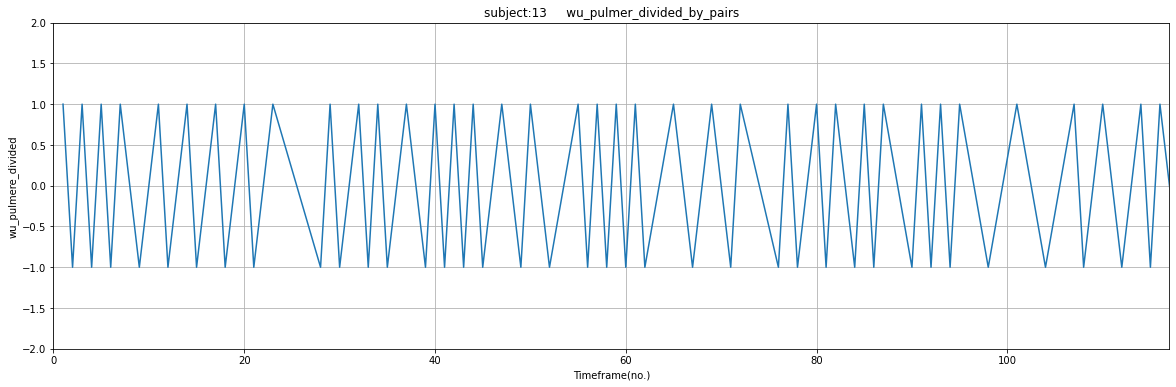

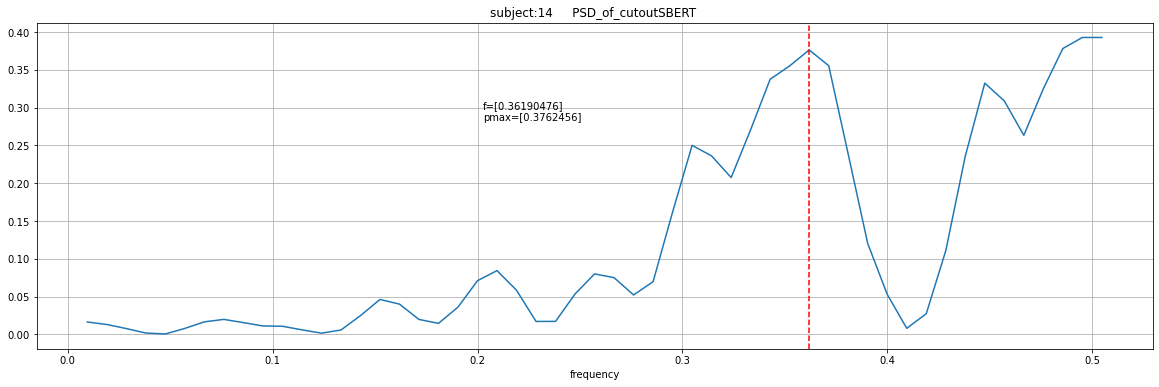

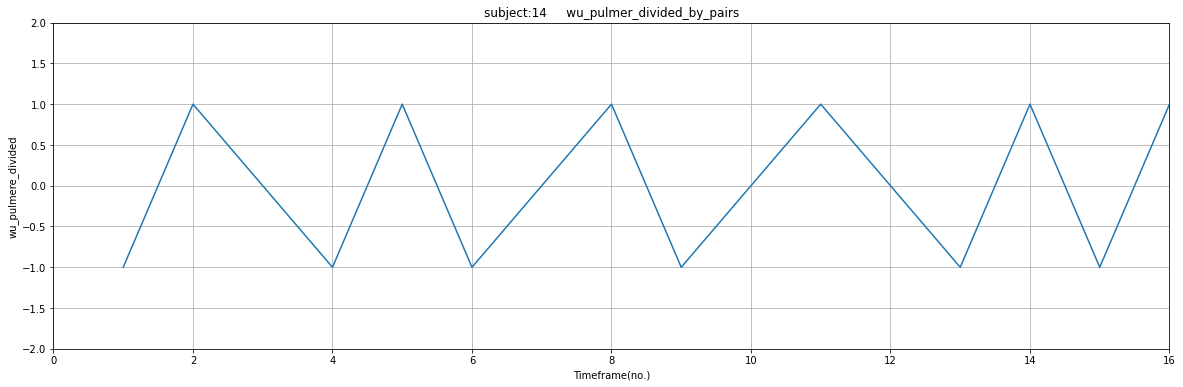

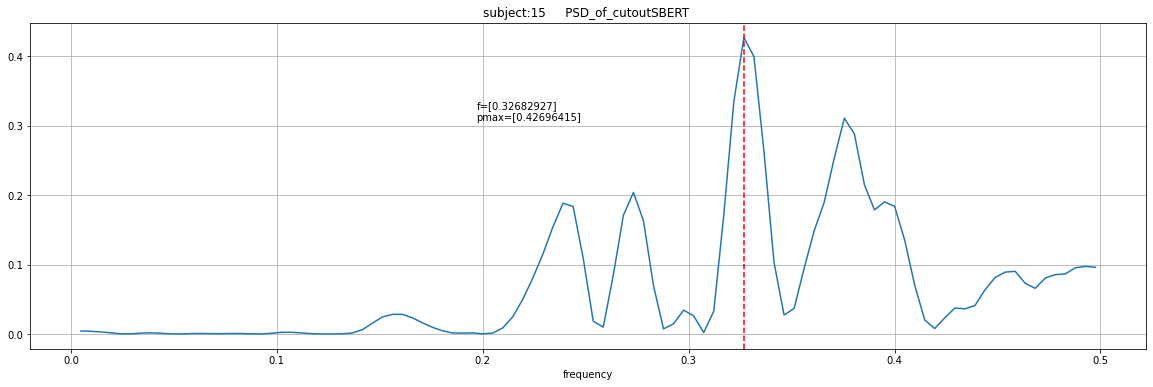

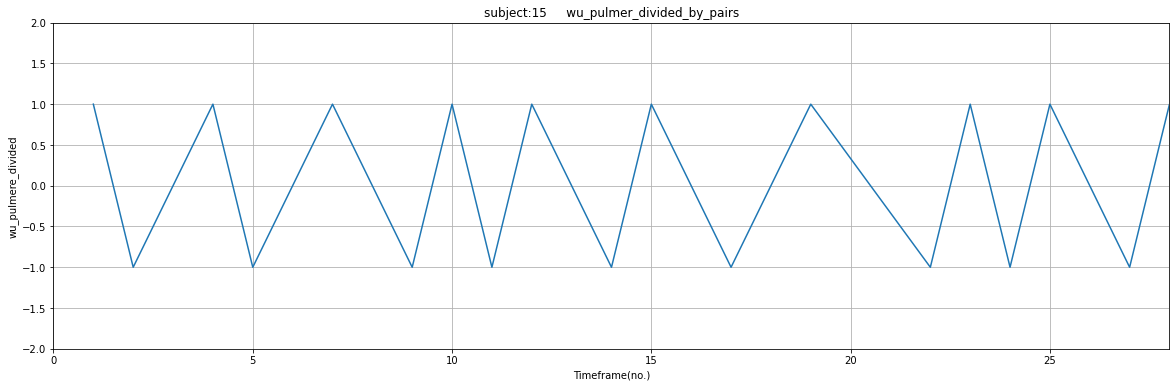

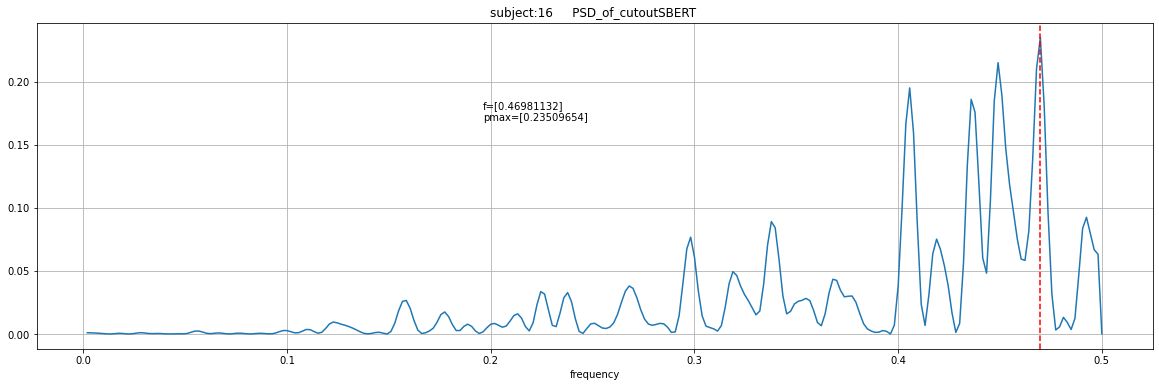

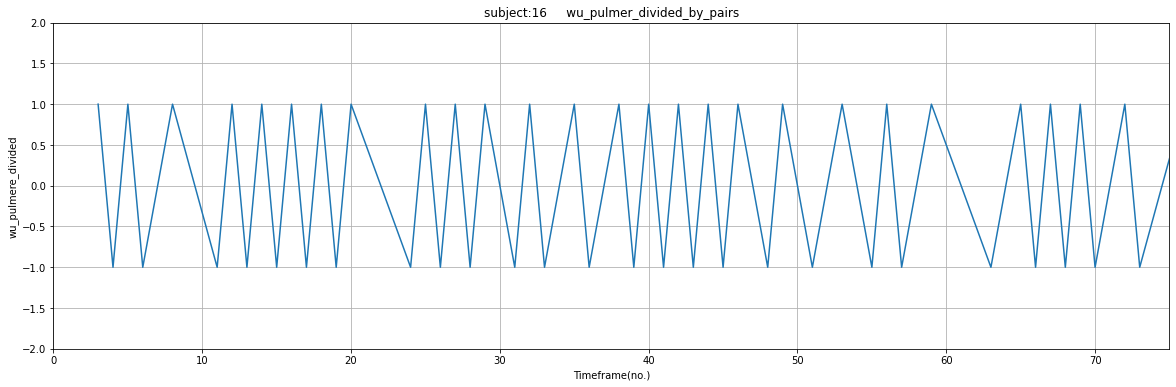

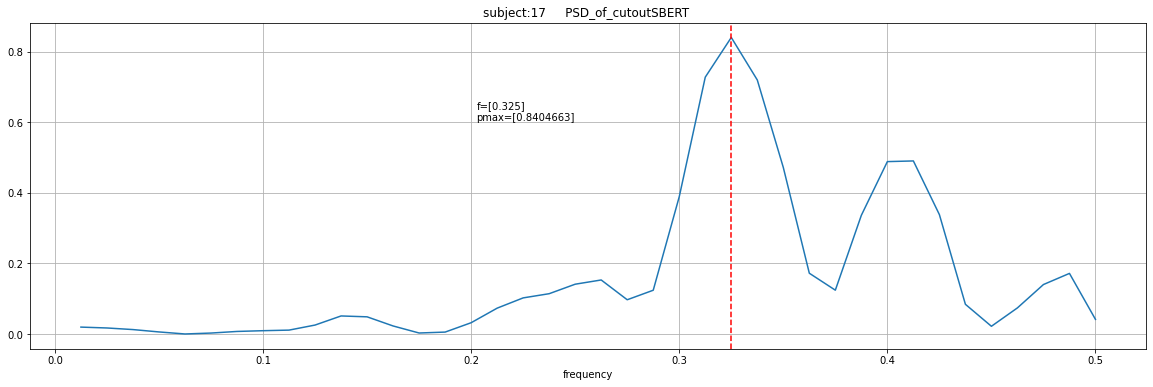

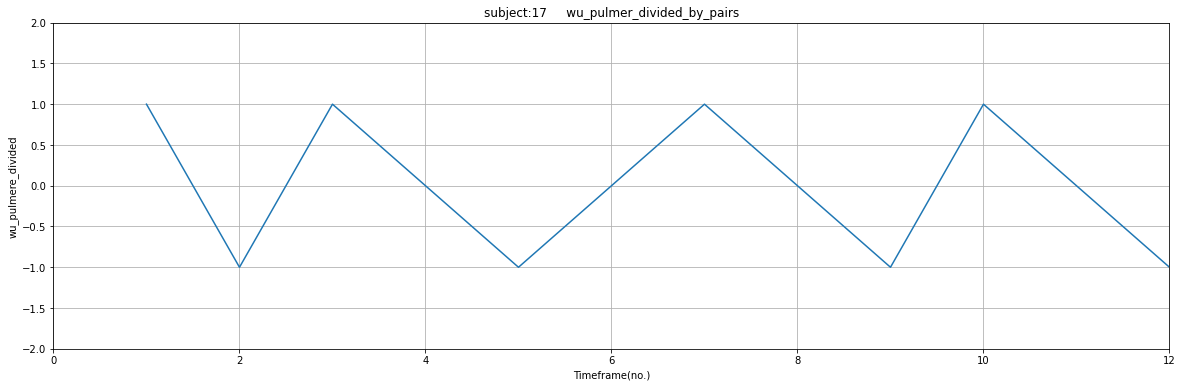

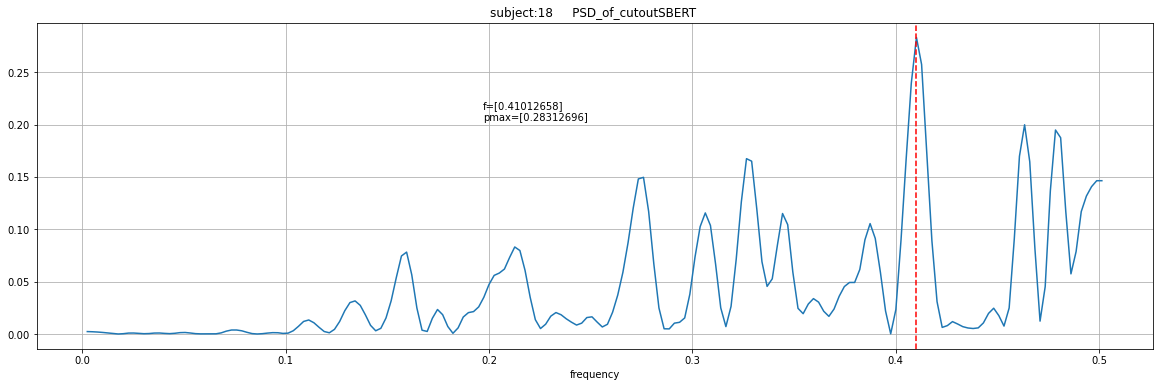

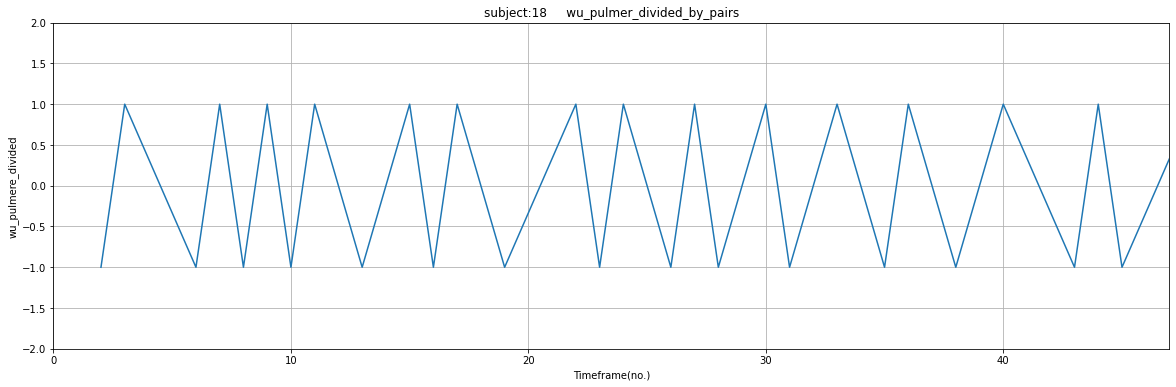

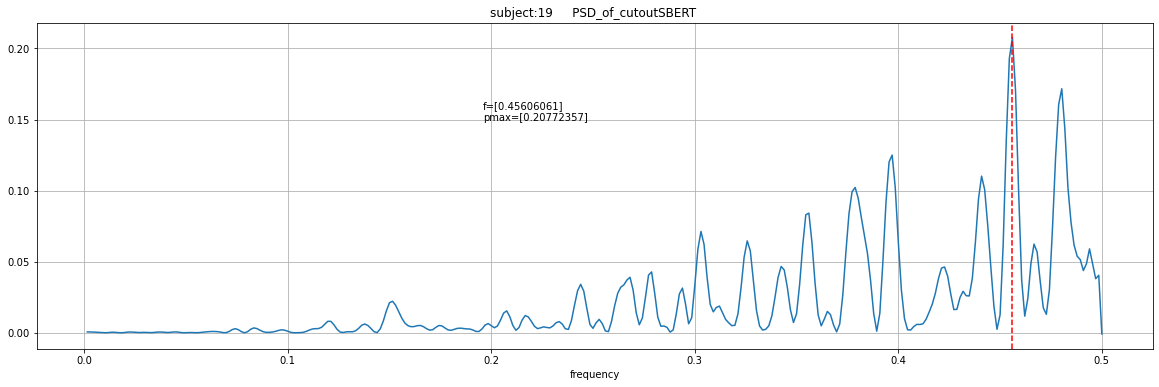

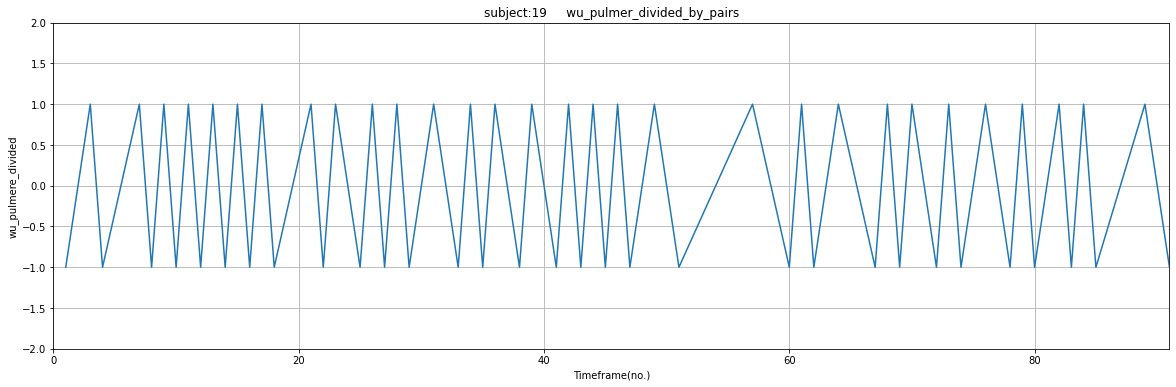

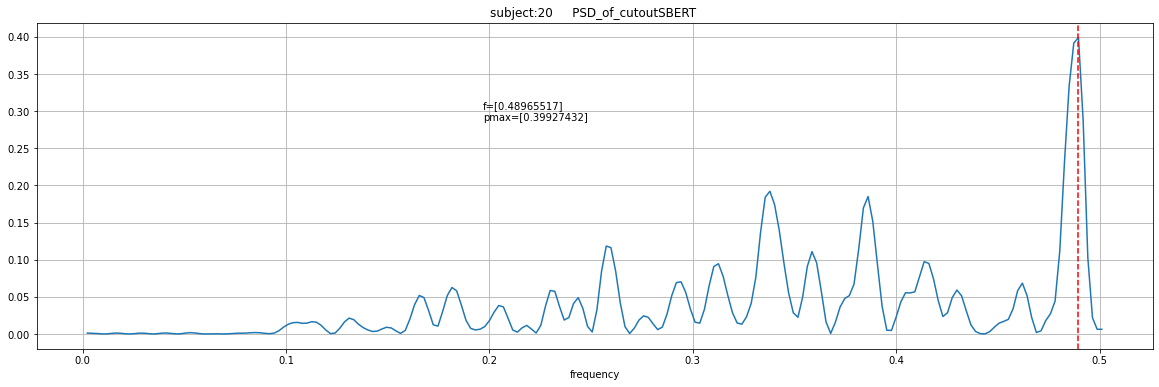

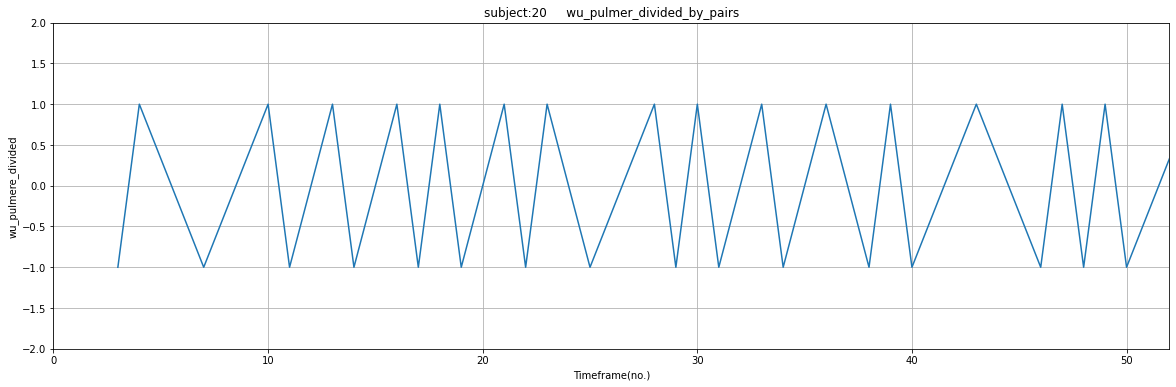

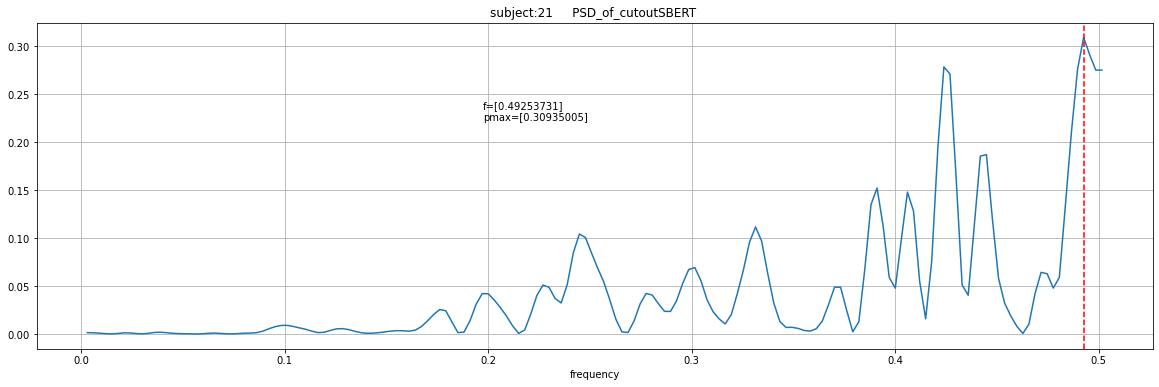

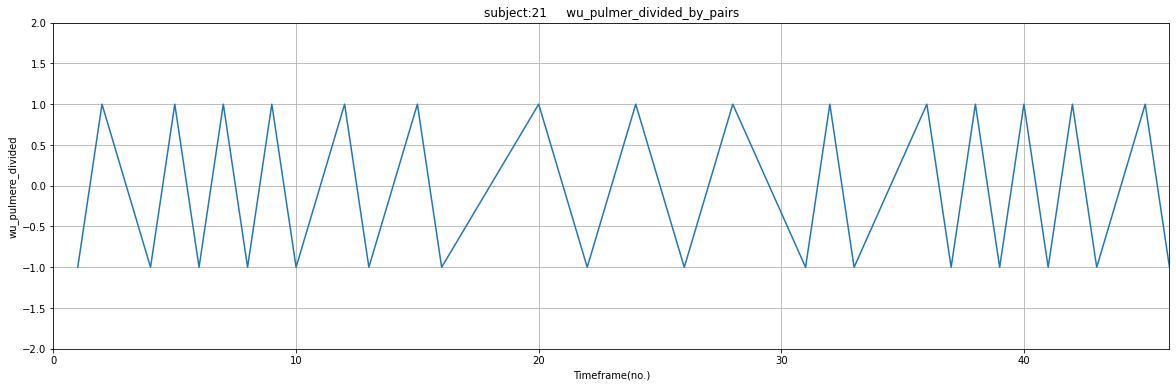

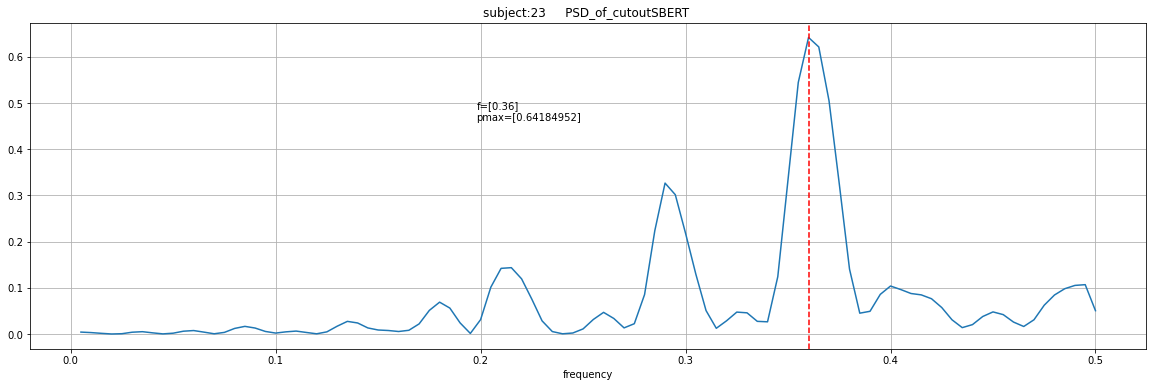

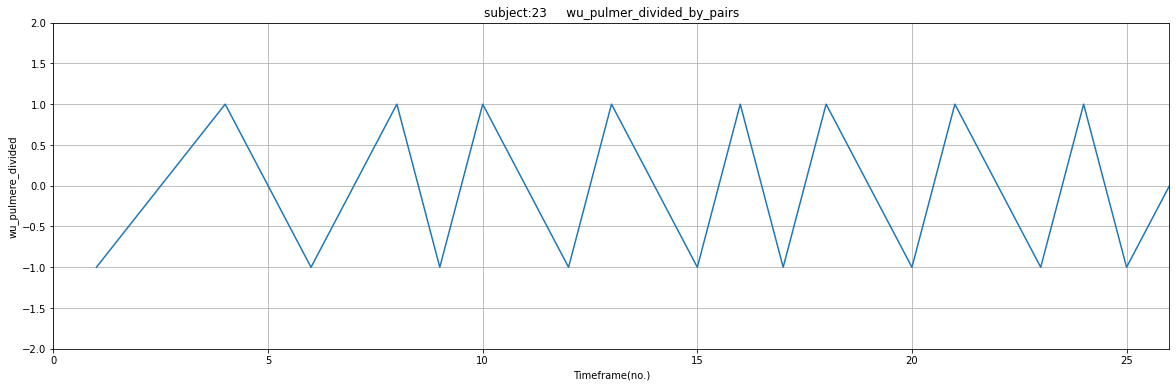

In [768]:

start_subject = int(input("start_subject = "))
end_subject = int(input("end_subject = "))
global q
for x in range (start_subject,end_subject+1):
    if x < 10:
        try:
            q = x
            read(f"data/Text/00{x}(peakstep).csv")
            create_pdf("PSD_OF_SBERT",x)
            find_extremum_and_SBERT_PSD(x,1)
            
            pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            q = x
            read(f"data/Text/0{x}(peakstep).csv")
            create_pdf("PSD_OF_SBERT",x)
            find_extremum_and_SBERT_PSD(x,1)
            
            pdfFile.close()
        except:
            print("error:", x)
            continue
print(cycle)


跑一般數據的PSD

In [769]:
'''
start_subject = int(input("start_subject = "))
end_subject = int(input("end_subject = "))

for x in range (start_subject,end_subject+1):
    if x < 10:
        try:
            
            read(f"data/Text/00{x}(results).csv")
            create_pdf("compare",x)
            calculate_PSD(x,3)
            read(f"data/Text/00{x}(peakstep).csv")
            calculate_PSD(x,1)
            pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            
            read(f"data/Text/0{x}(results).csv")
            create_pdf("compare",x)
            calculate_PSD(x,3)
            read(f"data/Text/0{x}(peakstep).csv")
            calculate_PSD(x,1)
            pdfFile.close()
        except:
            print("error:", x)
            continue
'''


'\nstart_subject = int(input("start_subject = "))\nend_subject = int(input("end_subject = "))\n\nfor x in range (start_subject,end_subject+1):\n    if x < 10:\n        try:\n            \n            read(f"data/Text/00{x}(results).csv")\n            create_pdf("compare",x)\n            calculate_PSD(x,3)\n            read(f"data/Text/00{x}(peakstep).csv")\n            calculate_PSD(x,1)\n            pdfFile.close()\n        except:\n            print("error:", x)\n            continue\n       \n    else:\n        try:\n            \n            read(f"data/Text/0{x}(results).csv")\n            create_pdf("compare",x)\n            calculate_PSD(x,3)\n            read(f"data/Text/0{x}(peakstep).csv")\n            calculate_PSD(x,1)\n            pdfFile.close()\n        except:\n            print("error:", x)\n            continue\n'

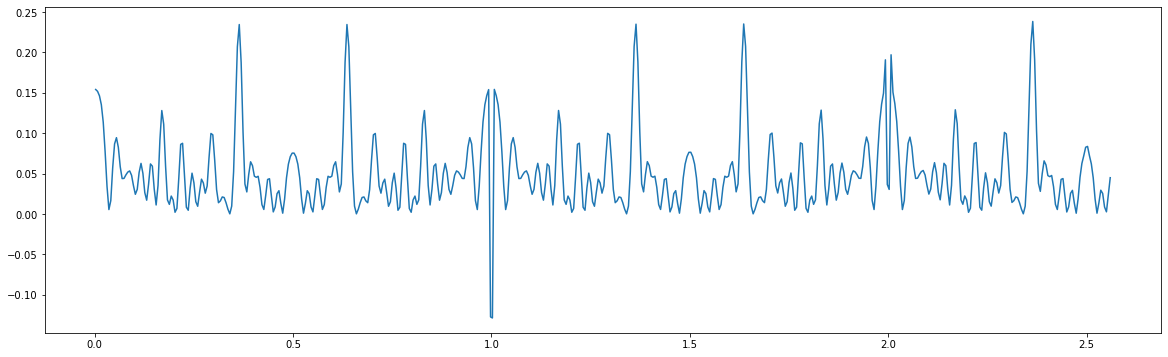

In [770]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,SBERT).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       

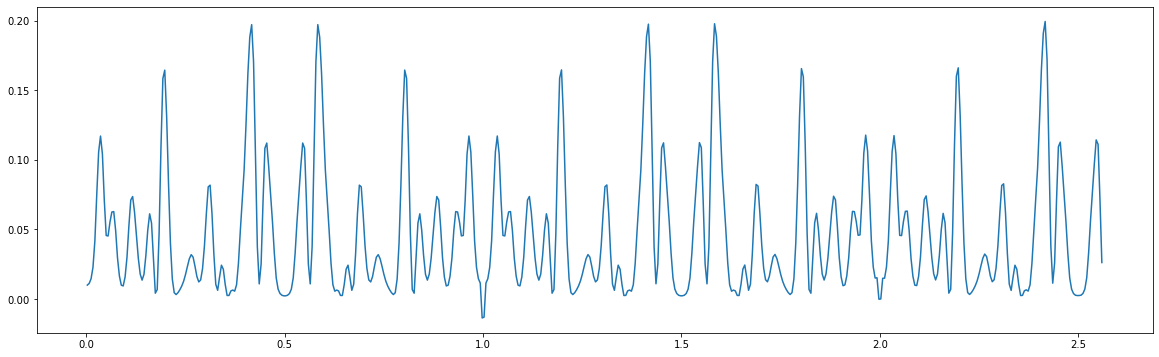

In [771]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       